In [1]:
import numpy as np
import pandas as pd
import os
from collections import Counter

import mode
from mode import process_data,visualize_data,mean_parameter,se_parameter,worst_parameter
from mode import split_model,ttdata

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,auc,roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

import warnings
warnings.filterwarnings('ignore')

np.random.seed(1)

# Loading the Data

In [2]:
df= pd.read_csv('breast-cancer.csv')

In [3]:
print("Column names in data:", df.columns)

Column names in data: Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


# Pre-processing and Visualizing data

In [4]:
# Creating a folder if it doesn't exist
if not os.path.exists('plots'):
    os.makedirs('plots')

In [3]:
df.drop(["Unnamed: 32","id"],axis=1,inplace=True)

In [4]:
process_data(df)


 	 The data has 569 diagnosis, 212 malignant and 357 benign.


classes are ['M' 'B']


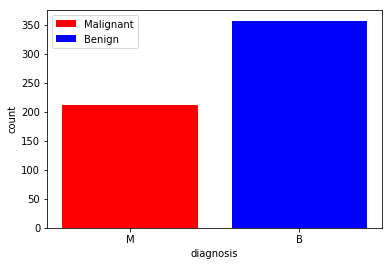

In [5]:
visualize_data(df)

In [6]:
#converting labels into integer values for binary classification
df['diagnosis']=df['diagnosis'].map({'M':1,'B':0})

# For Mean Parameters

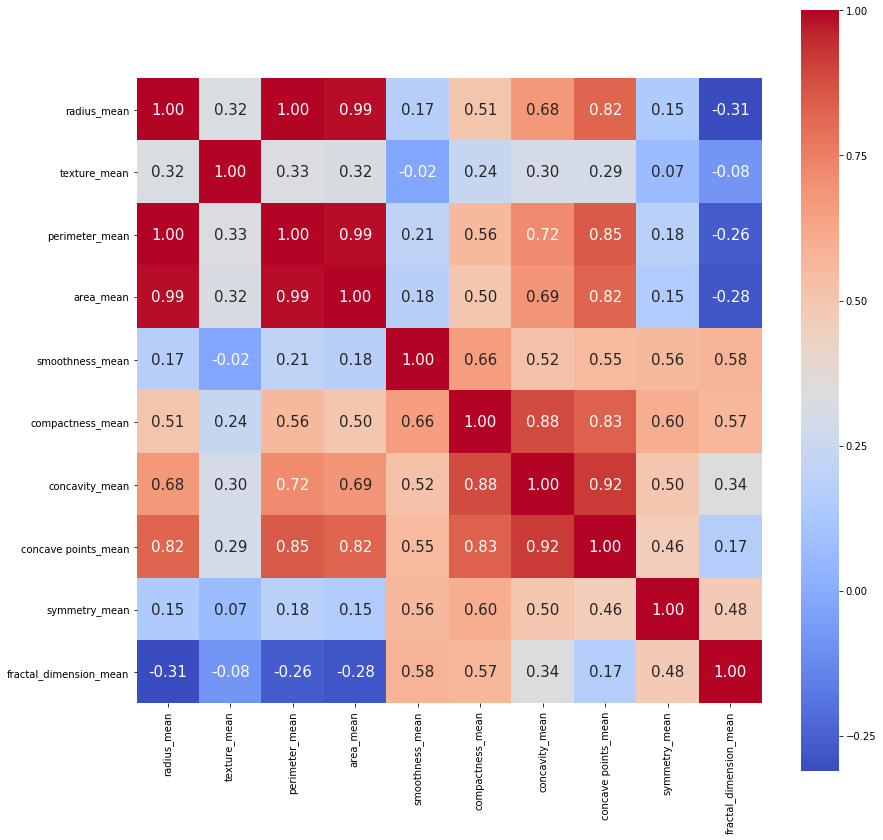

In [9]:
mean_parameter(df)

In [8]:
selected_parameter_mean = ['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean']

In [12]:
mean_acc=[]
mean_cvs=[]

# Splitting the model for training and testing with a test_size of 20 %

In [9]:
train,test=split_model(df)

train data shape (455, 31)
test data shape (114, 31)


In [10]:
train_X,train_y,test_X,test_y=ttdata(train,test,selected_parameter_mean)

# Logistic Regression Classifier

In [14]:
np.random.seed(1)
clf = LogisticRegression()
clf.fit(train_X,train_y)
prediction=clf.predict(test_X)
scores = cross_val_score(clf,train_X,train_y, cv=5)
mean_acc.append(accuracy_score(prediction,test_y))
mean_cvs.append(np.mean(scores))
print("model accuracy: {0:.2%}".format(accuracy_score(prediction, test_y)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
    #print("model accuracy:",metrics.accuracy_score(prediction)

model accuracy: 90.35%
Cross validation score: 89.25% (+/- 7.70%)


# Nearest Neighbors Classifier

In [15]:
np.random.seed(1)
clf = KNeighborsClassifier(n_neighbors=15,p=2,algorithm='kd_tree',leaf_size=20)
clf.fit(train_X,train_y)
prediction=clf.predict(test_X)
scores = cross_val_score(clf,train_X,train_y, cv=5)
mean_acc.append(accuracy_score(prediction,test_y))
mean_cvs.append(np.mean(scores))
print("model accuracy: {0:.2%}".format(accuracy_score(prediction, test_y)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
    #print("model accuracy:",metrics.accuracy_score(prediction)

model accuracy: 86.84%
Cross validation score: 90.57% (+/- 5.92%)


# Decision Tree Classifier

In [16]:
np.random.seed(1)
clf = DecisionTreeClassifier(splitter='best')
clf.fit(train_X,train_y)
prediction=clf.predict(test_X)
scores = cross_val_score(clf,train_X,train_y, cv=5)
mean_acc.append(accuracy_score(prediction,test_y))
mean_cvs.append(np.mean(scores))
print("model accuracy: {0:.2%}".format(accuracy_score(prediction, test_y)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
    #print("model accuracy:",metrics.accuracy_score(prediction)

model accuracy: 85.09%
Cross validation score: 92.32% (+/- 4.72%)


# Random Forest Classifier

In [17]:
np.random.seed(1)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(train_X,train_y)
prediction=clf.predict(test_X)
scores = cross_val_score(clf,train_X,train_y, cv=5)
mean_acc.append(accuracy_score(prediction,test_y))
mean_cvs.append(np.mean(scores))
print("model accuracy: {0:.2%}".format(accuracy_score(prediction, test_y)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
    #print("model accuracy:",metrics.accuracy_score(prediction)

model accuracy: 87.72%
Cross validation score: 93.19% (+/- 2.54%)


# Naive Bayes Classifier

In [18]:
np.random.seed(1)
clf = GaussianNB(var_smoothing=1e-7)
clf.fit(train_X,train_y)
prediction=clf.predict(test_X)
scores = cross_val_score(clf,train_X,train_y, cv=5)
mean_acc.append(accuracy_score(prediction,test_y))
mean_cvs.append(np.mean(scores))
print("model accuracy: {0:.2%}".format(accuracy_score(prediction, test_y)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
    #print("model accuracy:",metrics.accuracy_score(prediction)

model accuracy: 89.47%
Cross validation score: 91.66% (+/- 5.59%)


# AdaBoost classifier

In [19]:
np.random.seed(1)
clf=AdaBoostClassifier(n_estimators=20,learning_rate=1)
clf.fit(train_X,train_y)
prediction=clf.predict(test_X)
scores = cross_val_score(clf,train_X,train_y, cv=5)
mean_acc.append(accuracy_score(prediction,test_y))
mean_cvs.append(np.mean(scores))
print("model accuracy: {0:.2%}".format(accuracy_score(prediction, test_y)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
    #print("model accuracy:",metrics.accuracy_score(prediction)

model accuracy: 92.11%
Cross validation score: 93.41% (+/- 6.94%)


# Radial Basis Function Classifier

In [20]:
np.random.seed(1)
kernel = 1.0 * RBF([1.0])
clf = GaussianProcessClassifier(kernel=kernel,max_iter_predict=100)
clf.fit(train_X,train_y)
prediction=clf.predict(test_X)
scores = cross_val_score(clf,train_X,train_y, cv=5)
mean_acc.append(accuracy_score(prediction,test_y))
mean_cvs.append(np.mean(scores))
print("model accuracy: {0:.2%}".format(accuracy_score(prediction, test_y)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
    #print("model accuracy:",metrics.accuracy_score(prediction)

model accuracy: 85.09%
Cross validation score: 89.69% (+/- 5.54%)


# Support Vector Machine Classifier

In [13]:
np.random.seed(1)
clf = SVC(C=4.0,kernel='linear')
clf.fit(train_X,train_y)
prediction=clf.predict(test_X)
scores = cross_val_score(clf,train_X,train_y, cv=5)
mean_acc.append(accuracy_score(prediction,test_y))
mean_cvs.append(np.mean(scores))
print("model accuracy: {0:.2%}".format(accuracy_score(prediction, test_y)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
    #print("model accuracy:",metrics.accuracy_score(prediction)

model accuracy: 87.72%
Cross validation score: 91.22% (+/- 4.53%)


# Quadratic Discriminant Analysis Classifier

In [22]:
np.random.seed(1)
clf = QuadraticDiscriminantAnalysis(reg_param=1.0)
clf.fit(train_X,train_y)
prediction=clf.predict(test_X)
scores = cross_val_score(clf,train_X,train_y, cv=5)
mean_acc.append(accuracy_score(prediction,test_y))
mean_cvs.append(np.mean(scores))
print("model accuracy: {0:.2%}".format(accuracy_score(prediction, test_y)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
    #print("model accuracy:",metrics.accuracy_score(prediction)

model accuracy: 91.23%
Cross validation score: 87.71% (+/- 7.29%)


# MultiLayer Perceptron Classifier

In [14]:
np.random.seed(1)
clf = MLPClassifier(hidden_layer_sizes=(32,),alpha=1, max_iter=1000,activation='relu',solver='adam'
                    ,shuffle=False)
clf.fit(train_X,train_y)
prediction=clf.predict(test_X)
scores = cross_val_score(clf,train_X,train_y, cv=5)
mean_acc.append(accuracy_score(prediction,test_y))
mean_cvs.append(np.mean(scores))
print("model accuracy: {0:.2%}".format(accuracy_score(prediction, test_y)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
    #print("model accuracy:",metrics.accuracy_score(prediction)

model accuracy: 94.74%
Cross validation score: 73.09% (+/- 38.35%)


# For Standard Error(SE) Parameters

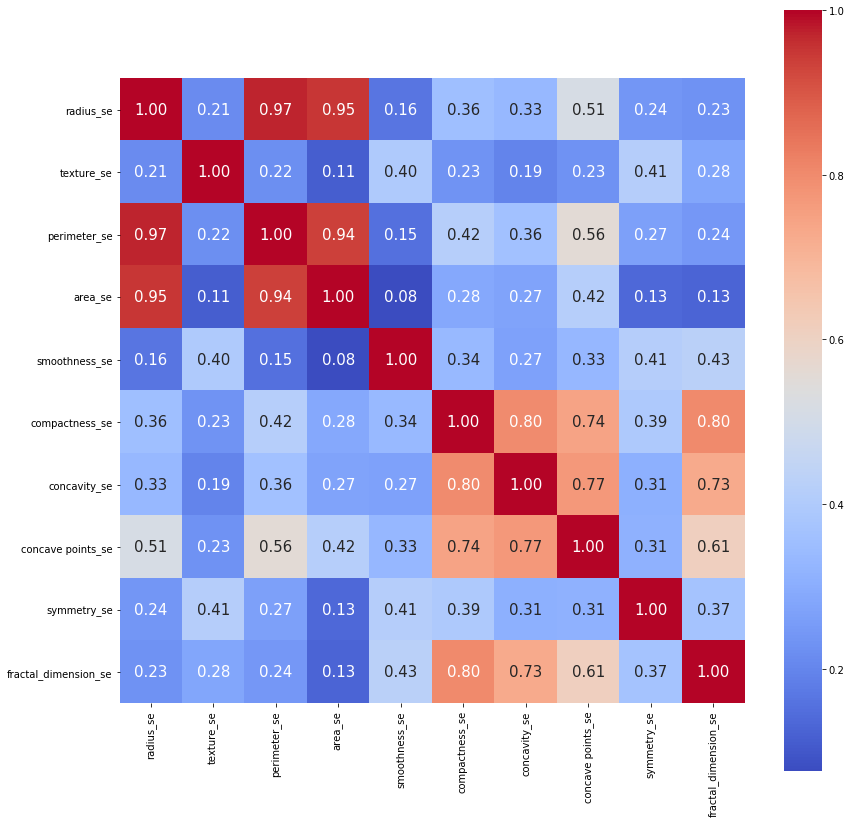

In [24]:
se_parameter(df)

In [14]:
selected_parameter_se = ['texture_se','perimeter_se','smoothness_se','compactness_se','symmetry_se']

In [15]:
se_acc=[]
se_cvs=[]

# Splitting the model for training and testing with a test_size of 20 %

In [16]:
train,test=split_model(df)

train data shape (455, 31)
test data shape (114, 31)


In [17]:
train_X,train_y,test_X,test_y=ttdata(train,test,selected_parameter_se)

# Logistic Regression Classifier

In [29]:
np.random.seed(1)
clf = LogisticRegression(tol=1e-4)
clf.fit(train_X,train_y)

prediction=clf.predict(test_X)
scores = cross_val_score(clf,train_X,train_y, cv=5)
se_acc.append(accuracy_score(prediction,test_y))
se_cvs.append(np.mean(scores))
print("model accuracy: {0:.2%}".format(accuracy_score(prediction, test_y)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
    #print("model accuracy:",metrics.accuracy_score(prediction)

model accuracy: 89.47%
Cross validation score: 80.89% (+/- 7.50%)


# Nearest Neighbors Classifier

In [30]:
np.random.seed(1)
clf = KNeighborsClassifier(n_neighbors=15,p=2,algorithm='ball_tree',leaf_size=20)
clf.fit(train_X,train_y)

prediction=clf.predict(test_X)
scores = cross_val_score(clf,train_X,train_y, cv=5)
se_acc.append(accuracy_score(prediction,test_y))
se_cvs.append(np.mean(scores))
print("model accuracy: {0:.2%}".format(accuracy_score(prediction, test_y)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
    #print("model accuracy:",metrics.accuracy_score(prediction)

model accuracy: 86.84%
Cross validation score: 81.33% (+/- 6.69%)


# Decision Tree Classifier

In [31]:
np.random.seed(1)
clf = DecisionTreeClassifier(splitter='best')
clf.fit(train_X,train_y)

prediction=clf.predict(test_X)
scores = cross_val_score(clf,train_X,train_y, cv=5)
se_acc.append(accuracy_score(prediction,test_y))
se_cvs.append(np.mean(scores))
print("model accuracy: {0:.2%}".format(accuracy_score(prediction, test_y)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
    #print("model accuracy:",metrics.accuracy_score(prediction)

model accuracy: 82.46%
Cross validation score: 76.04% (+/- 2.66%)


# Random Forest Classifier

In [32]:
np.random.seed(1)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(train_X,train_y)

prediction=clf.predict(test_X)
scores = cross_val_score(clf,train_X,train_y, cv=5)
se_acc.append(accuracy_score(prediction,test_y))
se_cvs.append(np.mean(scores))
print("model accuracy: {0:.2%}".format(accuracy_score(prediction, test_y)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
    #print("model accuracy:",metrics.accuracy_score(prediction)

model accuracy: 83.33%
Cross validation score: 80.22% (+/- 4.40%)


# Naive Bayes Classifier

In [33]:
np.random.seed(1)
clf = GaussianNB(var_smoothing=1e-7)
clf.fit(train_X,train_y)

prediction=clf.predict(test_X)
scores = cross_val_score(clf,train_X,train_y, cv=5)
se_acc.append(accuracy_score(prediction,test_y))
se_cvs.append(np.mean(scores))
print("model accuracy: {0:.2%}".format(accuracy_score(prediction, test_y)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
    #print("model accuracy:",metrics.accuracy_score(prediction)

model accuracy: 89.47%
Cross validation score: 76.50% (+/- 5.58%)


# AdaBoost classifier

In [34]:
np.random.seed(1)
clf=AdaBoostClassifier(n_estimators=20,learning_rate=1)
clf.fit(train_X,train_y)

prediction=clf.predict(test_X)
scores = cross_val_score(clf,train_X,train_y, cv=5)
se_acc.append(accuracy_score(prediction,test_y))
se_cvs.append(np.mean(scores))
print("model accuracy: {0:.2%}".format(accuracy_score(prediction, test_y)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
    #print("model accuracy:",metrics.accuracy_score(prediction)

model accuracy: 84.21%
Cross validation score: 82.20% (+/- 2.17%)


# Radial Basis Function Classifier

In [35]:
np.random.seed(1)
kernel = 1.0 * RBF([1.0])
clf = GaussianProcessClassifier(kernel=kernel,max_iter_predict=100)
clf.fit(train_X,train_y)

prediction=clf.predict(test_X)
scores = cross_val_score(clf,train_X,train_y, cv=5)
se_acc.append(accuracy_score(prediction,test_y))
se_cvs.append(np.mean(scores))
print("model accuracy: {0:.2%}".format(accuracy_score(prediction, test_y)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
    #print("model accuracy:",metrics.accuracy_score(prediction)

model accuracy: 88.60%
Cross validation score: 80.67% (+/- 7.88%)


# Support Vector Machine Classifier

In [18]:
np.random.seed(1)
clf = SVC(C=4.0,kernel='linear')
clf.fit(train_X,train_y)
prediction=clf.predict(test_X)
scores = cross_val_score(clf,train_X,train_y, cv=5)
se_acc.append(accuracy_score(prediction,test_y))
se_cvs.append(np.mean(scores))
print("model accuracy: {0:.2%}".format(accuracy_score(prediction, test_y)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
    #print("model accuracy:",metrics.accuracy_score(prediction)

model accuracy: 89.47%
Cross validation score: 80.89% (+/- 6.81%)


# Quadratic Discriminant Analysis Classifier

In [37]:
np.random.seed(1)
clf = QuadraticDiscriminantAnalysis(reg_param=1.0)
clf.fit(train_X,train_y)

prediction=clf.predict(test_X)
scores = cross_val_score(clf,train_X,train_y, cv=5)
se_acc.append(accuracy_score(prediction,test_y))
se_cvs.append(np.mean(scores))
print("model accuracy: {0:.2%}".format(accuracy_score(prediction, test_y)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
    #print("model accuracy:",metrics.accuracy_score(prediction)

model accuracy: 86.84%
Cross validation score: 78.69% (+/- 3.96%)


# MultiLayer Perceptron Classifier

In [26]:
np.random.seed(1)
clf = MLPClassifier(hidden_layer_sizes=(32,),alpha=1, max_iter=1000,activation='relu',solver='adam',
                    shuffle=False)
clf.fit(train_X,train_y)

prediction=clf.predict(test_X)
scores = cross_val_score(clf,train_X,train_y, cv=5)
se_acc.append(accuracy_score(prediction,test_y))
se_cvs.append(np.mean(scores))
print("model accuracy: {0:.2%}".format(accuracy_score(prediction, test_y)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
    #print("model accuracy:",metrics.accuracy_score(prediction)

model accuracy: 89.47%
Cross validation score: 80.44% (+/- 6.08%)


# For Worst Parameters

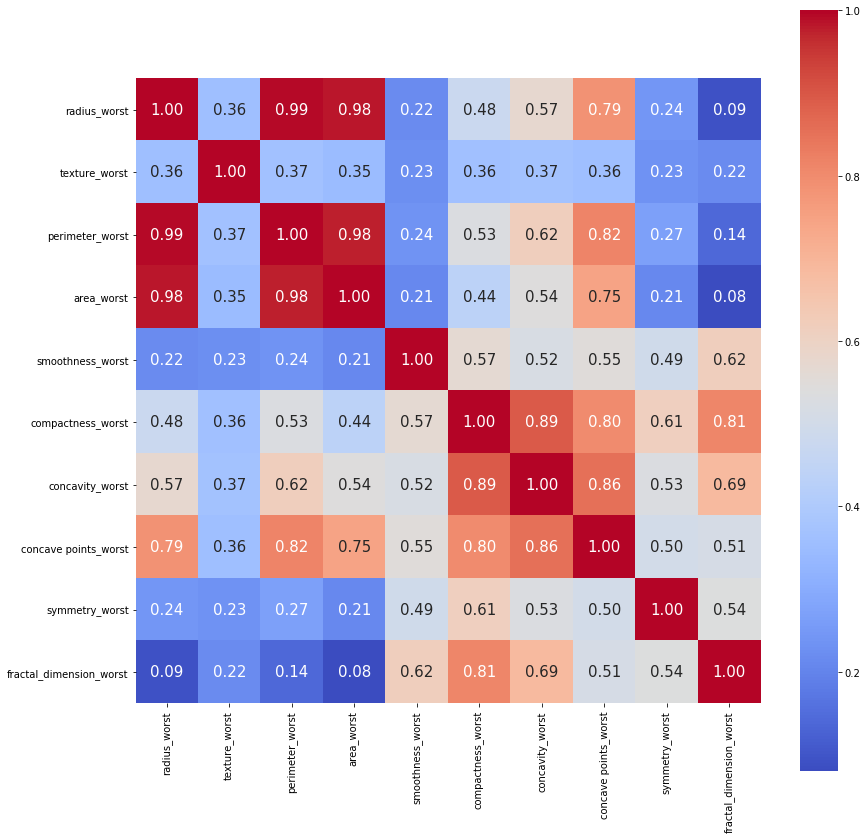

In [39]:
worst_parameter(df)

In [19]:
selected_parameter_worst = ['texture_worst','perimeter_worst','smoothness_worst','compactness_worst','symmetry_worst']

In [20]:
worst_acc=[]
worst_cvs=[]

# Splitting the model for training and testing with a test_size of 20 %

In [21]:
train,test=split_model(df)

train data shape (455, 31)
test data shape (114, 31)


In [22]:
train_X,train_y,test_X,test_y=ttdata(train,test,selected_parameter_worst)

# Logistic Regression Classifier

In [44]:
np.random.seed(1)
clf = LogisticRegression()
clf.fit(train_X,train_y)

prediction=clf.predict(test_X)
scores = cross_val_score(clf,train_X,train_y, cv=5)
worst_acc.append(accuracy_score(prediction,test_y))
worst_cvs.append(np.mean(scores))
print("model accuracy: {0:.2%}".format(accuracy_score(prediction, test_y)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
    #print("model accuracy:",metrics.accuracy_score(prediction)

model accuracy: 95.61%
Cross validation score: 94.07% (+/- 3.26%)


# Nearest Neighbors Classifier

In [45]:
np.random.seed(1)
clf = KNeighborsClassifier(n_neighbors=15,p=2,algorithm='kd_tree',leaf_size=20)
clf.fit(train_X,train_y)

prediction=clf.predict(test_X)
scores = cross_val_score(clf,train_X,train_y, cv=5)
worst_acc.append(accuracy_score(prediction,test_y))
worst_cvs.append(np.mean(scores))
print("model accuracy: {0:.2%}".format(accuracy_score(prediction, test_y)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
    #print("model accuracy:",metrics.accuracy_score(prediction)

model accuracy: 93.86%
Cross validation score: 94.95% (+/- 1.69%)


# Decision Tree Classifier

In [16]:
np.random.seed(1)
clf = DecisionTreeClassifier(splitter='best')
clf.fit(train_X,train_y)

prediction=clf.predict(test_X)
scores = cross_val_score(clf,train_X,train_y, cv=5)
worst_acc.append(accuracy_score(prediction,test_y))
worst_cvs.append(np.mean(scores))
print("model accuracy: {0:.2%}".format(accuracy_score(prediction, test_y)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
    #print("model accuracy:",metrics.accuracy_score(prediction)

model accuracy: 89.47%
Cross validation score: 94.07% (+/- 2.20%)


# Random Forest Classifier

In [47]:
np.random.seed(1)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(train_X,train_y)

prediction=clf.predict(test_X)
scores = cross_val_score(clf,train_X,train_y, cv=5)
worst_acc.append(accuracy_score(prediction,test_y))
worst_cvs.append(np.mean(scores))
print("model accuracy: {0:.2%}".format(accuracy_score(prediction, test_y)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
    #print("model accuracy:",metrics.accuracy_score(prediction)

model accuracy: 94.74%
Cross validation score: 96.26% (+/- 1.76%)


# Naive Bayes Classifier

In [48]:
np.random.seed(1)
clf = GaussianNB(var_smoothing=1e-7)
clf.fit(train_X,train_y)

prediction=clf.predict(test_X)
scores = cross_val_score(clf,train_X,train_y, cv=5)
worst_acc.append(accuracy_score(prediction,test_y))
worst_cvs.append(np.mean(scores))
print("model accuracy: {0:.2%}".format(accuracy_score(prediction, test_y)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
    #print("model accuracy:",metrics.accuracy_score(prediction)

model accuracy: 95.61%
Cross validation score: 95.17% (+/- 2.61%)


# AdaBoost classifier

In [49]:
np.random.seed(1)
clf=AdaBoostClassifier(n_estimators=20,learning_rate=1)
clf.fit(train_X,train_y)

prediction=clf.predict(test_X)
scores = cross_val_score(clf,train_X,train_y, cv=5)
worst_acc.append(accuracy_score(prediction,test_y))
worst_cvs.append(np.mean(scores))
print("model accuracy: {0:.2%}".format(accuracy_score(prediction, test_y)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
    #print("model accuracy:",metrics.accuracy_score(prediction)

model accuracy: 93.86%
Cross validation score: 94.28% (+/- 2.58%)


# Radial Basis Function Classifier

In [50]:
np.random.seed(1)
kernel = 1.0 * RBF([1.0])
clf = GaussianProcessClassifier(kernel=kernel,max_iter_predict=100)
clf.fit(train_X,train_y)

prediction=clf.predict(test_X)
scores = cross_val_score(clf,train_X,train_y, cv=5)
worst_acc.append(accuracy_score(prediction,test_y))
worst_cvs.append(np.mean(scores))
print("model accuracy: {0:.2%}".format(accuracy_score(prediction, test_y)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
    #print("model accuracy:",metrics.accuracy_score(prediction)

model accuracy: 92.98%
Cross validation score: 94.73% (+/- 1.58%)


# Support Vector Machine Classifier

In [25]:
np.random.seed(1)
clf = SVC(C=3.0,kernel='linear')
clf.fit(train_X,train_y)

prediction=clf.predict(test_X)
scores = cross_val_score(clf,train_X,train_y, cv=5)
worst_acc.append(accuracy_score(prediction,test_y))
worst_cvs.append(np.mean(scores))
print("model accuracy: {0:.2%}".format(accuracy_score(prediction, test_y)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
    #print("model accuracy:",metrics.accuracy_score(prediction)

model accuracy: 95.61%
Cross validation score: 95.83% (+/- 1.62%)


# Quadratic Discriminant Analysis Classifier

In [52]:
np.random.seed(1)
clf = QuadraticDiscriminantAnalysis(reg_param=1.0)
clf.fit(train_X,train_y)

prediction=clf.predict(test_X)
scores = cross_val_score(clf,train_X,train_y, cv=5)
worst_acc.append(accuracy_score(prediction,test_y))
worst_cvs.append(np.mean(scores))
print("model accuracy: {0:.2%}".format(accuracy_score(prediction, test_y)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
    #print("model accuracy:",metrics.accuracy_score(prediction)

model accuracy: 95.61%
Cross validation score: 91.66% (+/- 6.07%)


# MultiLayer Perceptron Classifier

In [41]:
np.random.seed(1)
clf = MLPClassifier(hidden_layer_sizes=(32,),alpha=1, max_iter=1000,activation='relu',solver='adam',
                   shuffle=False)
clf.fit(train_X,train_y)

prediction=clf.predict(test_X)
scores = cross_val_score(clf,train_X,train_y, cv=5)
worst_acc.append(accuracy_score(prediction,test_y))
worst_cvs.append(np.mean(scores))
print("model accuracy: {0:.2%}".format(accuracy_score(prediction, test_y)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
    #print("model accuracy:",metrics.accuracy_score(prediction)

model accuracy: 96.49%
Cross validation score: 90.95% (+/- 16.76%)


# Visualizing the performance matrix

In [54]:
index=['Logistic Regression','Nearest Neighbors', 'Decision Tree', 'Random Forest', 'Naive Bayes', 
       'AdaBoost','Radial Basis Function','Support Vector Machine', 'Quadratic Discriminant Analysis',
       'MultiLayer Perceptron']
data={'mean_accuracy':mean_acc,'mean_cvs':mean_cvs,'se_accuracy':se_acc,'se_cvs':se_cvs,
      'worst_accuracy':worst_acc,'worst_cvs':worst_cvs}
dataframe = pd.DataFrame(data,index=index)
dataframe

,mean_accuracy,mean_cvs,se_accuracy,se_cvs,worst_accuracy,worst_cvs
Logistic Regression,0.903509,0.892496,0.894737,0.808880,0.956140,0.940705
Nearest Neighbors,0.868421,0.905660,0.868421,0.813324,0.938596,0.949496
Decision Tree,0.850877,0.923218,0.824561,0.760405,0.894737,0.940705
Random Forest,0.877193,0.931889,0.833333,0.802189,0.947368,0.962636
Naive Bayes,0.894737,0.916625,0.894737,0.764993,0.956140,0.951695
AdaBoost,0.921053,0.934112,0.842105,0.821970,0.938596,0.942831
Radial Basis Function,0.850877,0.896867,0.885965,0.806683,0.929825,0.947298
Support Vector Machine,0.877193,0.912205,0.894737,0.808904,0.956140,0.958264
Quadratic Discriminant Analysis,0.912281,0.877110,0.868421,0.786876,0.956140,0.916624
MultiLayer Perceptron,0.947368,0.730908,0.894737,0.800064,0.947368,0.834014


# As it can be seen that the accuracy is most in SVM Classifier, lets use it to predict the testing dataset.

In [7]:
train,test=split_model(df)

train data shape (455, 31)
test data shape (114, 31)


In [8]:
selected_parameter_worst = ['texture_worst','perimeter_worst','smoothness_worst','compactness_worst','symmetry_worst']

In [9]:
train_X,train_y,test_X,test_y=ttdata(train,test,selected_parameter_worst)

In [10]:
clf = SVC(C=3.0,kernel='linear')
clf.fit(train_X,train_y)

prediction=clf.predict(test_X)

In [12]:
prediction

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0])

# Calculation of loss function

In [54]:
loss = 0

for predicted_value,actual_value in zip(prediction,test_y):
    if predicted_value == actual_value:
        pass
    else:
        loss += 1

print("Loss :",loss/len(prediction)*100,"%")

Loss : 4.385964912280701 %


# Confusion Matrix

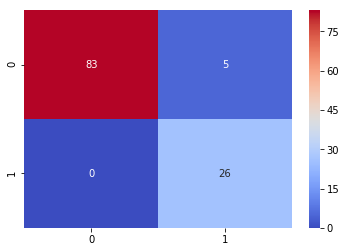

In [55]:
#create confusion matrix
cm = confusion_matrix(test_y, prediction)
# prepare heatmap
sns.heatmap(cm, annot= True,cmap= 'coolwarm')

In [56]:
print("Accuracy score %f" % accuracy_score(test_y, prediction))
print(classification_report(test_y, prediction))

Accuracy score 0.956140
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        88
           1       0.84      1.00      0.91        26

    accuracy                           0.96       114
   macro avg       0.92      0.97      0.94       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
fpr,tpr,_ = roc_curve(test_y,prediction)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(14,12))
plt.title('Receiver Operating Characteristic')
sns.lineplot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.savefig(os.path.join(os.getcwd(),'plots','roc.png'), dpi=300) 